In [1]:
import os
import sys
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
sys.path.insert(0, os.getcwd())
print(f"Aktuelles Arbeitsverzeichnis: {os.getcwd()}")

Aktuelles Arbeitsverzeichnis: c:\Users\hp\OneDrive\Desktop\DBU\wai81-ai-theory\ml_picture_recognition


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

from utils.dataloader import HockeyDataset
from utils.transforms import val_transform
from torch.utils.data import DataLoader


In [3]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameter
test_csv = "data/labels_test.csv"
frames_root = "data/test_frames"
frames_per_clip = 16
batch_size = 4

In [4]:
# Test-Dataset

test_dataset = HockeyDataset(
    csv_file=test_csv,
    frames_root=frames_root,
    transform=val_transform,
    frames_per_clip=frames_per_clip
)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)


In [5]:
# Labels
class_names = ["Check", "Neutral", "Schuss", "Tor"]

In [6]:
# --- Modell-Definition ---

from torchvision.models import resnet18
from torchvision.models.video import r3d_18

class ResNet18_LSTM(nn.Module):
    def __init__(self, num_classes=4):
        super(ResNet18_LSTM, self).__init__()
        self.resnet = resnet18(weights=None)
        self.resnet.fc = nn.Identity()
        self.lstm = nn.LSTM(input_size=512, hidden_size=128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)
    
    def forward(self, x):
        B, T, C, H, W = x.size()
        x = x.view(B*T, C, H, W)
        x = self.resnet(x)
        x = x.view(B, T, -1)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.fc(x)
        return x

In [ ]:
# Lade beide Modelle

# R3D18
model_r3d18 = r3d_18()
model_r3d18.fc = nn.Linear(model_r3d18.fc.in_features, 4)
model_r3d18.load_state_dict(torch.load("models/best_r3d18.pth"))
model_r3d18 = model_r3d18.to(device)
model_r3d18.eval()

# ResNet18 + LSTM
model_resnet18_lstm = ResNet18_LSTM()
model_resnet18_lstm.load_state_dict(torch.load("models/best_resnet18_lstm.pth"))
model_resnet18_lstm = model_resnet18_lstm.to(device)
model_resnet18_lstm.eval()

C:\Users\hp\AppData\Local\Temp\ipykernel_18408\710926698.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_r3d18.load_state_dict(torch.load("models/best_r3d18.pth"))

RuntimeError: Error(s) in loading state_dict for ResNet18_LSTM:
	Missing key(s) in state_dict: "resnet.conv1.weight", "resnet.bn1.weight", "resnet.bn1.bias", "resnet.bn1.running_mean", "resnet.bn1.running_var", "resnet.layer1.0.conv1.weight", "resnet.layer1.0.bn1.weight", "resnet.layer1.0.bn1.bias", "resnet.layer1.0.bn1.running_mean", "resnet.layer1.0.bn1.running_var", "resnet.layer1.0.conv2.weight", "resnet.layer1.0.bn2.weight", "resnet.layer1.0.bn2.bias", "resnet.layer1.0.bn2.running_mean", "resnet.layer1.0.bn2.running_var", "resnet.layer1.1.conv1.weight", "resnet.layer1.1.bn1.weight", "resnet.layer1.1.bn1.bias", "resnet.layer1.1.bn1.running_mean", "resnet.layer1.1.bn1.running_var", "resnet.layer1.1.conv2.weight", "resnet.layer1.1.bn2.weight", "resnet.layer1.1.bn2.bias", "resnet.layer1.1.bn2.running_mean", "resnet.layer1.1.bn2.running_var", "resnet.layer2.0.conv1.weight", "resnet.layer2.0.bn1.weight", "resnet.layer2.0.bn1.bias", "resnet.layer2.0.bn1.running_mean", "resnet.layer2.0.bn1.running_var", "resnet.layer2.0.conv2.weight", "resnet.layer2.0.bn2.weight", "resnet.layer2.0.bn2.bias", "resnet.layer2.0.bn2.running_mean", "resnet.layer2.0.bn2.running_var", "resnet.layer2.0.downsample.0.weight", "resnet.layer2.0.downsample.1.weight", "resnet.layer2.0.downsample.1.bias", "resnet.layer2.0.downsample.1.running_mean", "resnet.layer2.0.downsample.1.running_var", "resnet.layer2.1.conv1.weight", "resnet.layer2.1.bn1.weight", "resnet.layer2.1.bn1.bias", "resnet.layer2.1.bn1.running_mean", "resnet.layer2.1.bn1.running_var", "resnet.layer2.1.conv2.weight", "resnet.layer2.1.bn2.weight", "resnet.layer2.1.bn2.bias", "resnet.layer2.1.bn2.running_mean", "resnet.layer2.1.bn2.running_var", "resnet.layer3.0.conv1.weight", "resnet.layer3.0.bn1.weight", "resnet.layer3.0.bn1.bias", "resnet.layer3.0.bn1.running_mean", "resnet.layer3.0.bn1.running_var", "resnet.layer3.0.conv2.weight", "resnet.layer3.0.bn2.weight", "resnet.layer3.0.bn2.bias", "resnet.layer3.0.bn2.running_mean", "resnet.layer3.0.bn2.running_var", "resnet.layer3.0.downsample.0.weight", "resnet.layer3.0.downsample.1.weight", "resnet.layer3.0.downsample.1.bias", "resnet.layer3.0.downsample.1.running_mean", "resnet.layer3.0.downsample.1.running_var", "resnet.layer3.1.conv1.weight", "resnet.layer3.1.bn1.weight", "resnet.layer3.1.bn1.bias", "resnet.layer3.1.bn1.running_mean", "resnet.layer3.1.bn1.running_var", "resnet.layer3.1.conv2.weight", "resnet.layer3.1.bn2.weight", "resnet.layer3.1.bn2.bias", "resnet.layer3.1.bn2.running_mean", "resnet.layer3.1.bn2.running_var", "resnet.layer4.0.conv1.weight", "resnet.layer4.0.bn1.weight", "resnet.layer4.0.bn1.bias", "resnet.layer4.0.bn1.running_mean", "resnet.layer4.0.bn1.running_var", "resnet.layer4.0.conv2.weight", "resnet.layer4.0.bn2.weight", "resnet.layer4.0.bn2.bias", "resnet.layer4.0.bn2.running_mean", "resnet.layer4.0.bn2.running_var", "resnet.layer4.0.downsample.0.weight", "resnet.layer4.0.downsample.1.weight", "resnet.layer4.0.downsample.1.bias", "resnet.layer4.0.downsample.1.running_mean", "resnet.layer4.0.downsample.1.running_var", "resnet.layer4.1.conv1.weight", "resnet.layer4.1.bn1.weight", "resnet.layer4.1.bn1.bias", "resnet.layer4.1.bn1.running_mean", "resnet.layer4.1.bn1.running_var", "resnet.layer4.1.conv2.weight", "resnet.layer4.1.bn2.weight", "resnet.layer4.1.bn2.bias", "resnet.layer4.1.bn2.running_mean", "resnet.layer4.1.bn2.running_var", "lstm.weight_ih_l0", "lstm.weight_hh_l0", "lstm.bias_ih_l0", "lstm.bias_hh_l0", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "encoder.feature_extractor.0.weight", "encoder.feature_extractor.1.weight", "encoder.feature_extractor.1.bias", "encoder.feature_extractor.1.running_mean", "encoder.feature_extractor.1.running_var", "encoder.feature_extractor.1.num_batches_tracked", "encoder.feature_extractor.4.0.conv1.weight", "encoder.feature_extractor.4.0.bn1.weight", "encoder.feature_extractor.4.0.bn1.bias", "encoder.feature_extractor.4.0.bn1.running_mean", "encoder.feature_extractor.4.0.bn1.running_var", "encoder.feature_extractor.4.0.bn1.num_batches_tracked", "encoder.feature_extractor.4.0.conv2.weight", "encoder.feature_extractor.4.0.bn2.weight", "encoder.feature_extractor.4.0.bn2.bias", "encoder.feature_extractor.4.0.bn2.running_mean", "encoder.feature_extractor.4.0.bn2.running_var", "encoder.feature_extractor.4.0.bn2.num_batches_tracked", "encoder.feature_extractor.4.1.conv1.weight", "encoder.feature_extractor.4.1.bn1.weight", "encoder.feature_extractor.4.1.bn1.bias", "encoder.feature_extractor.4.1.bn1.running_mean", "encoder.feature_extractor.4.1.bn1.running_var", "encoder.feature_extractor.4.1.bn1.num_batches_tracked", "encoder.feature_extractor.4.1.conv2.weight", "encoder.feature_extractor.4.1.bn2.weight", "encoder.feature_extractor.4.1.bn2.bias", "encoder.feature_extractor.4.1.bn2.running_mean", "encoder.feature_extractor.4.1.bn2.running_var", "encoder.feature_extractor.4.1.bn2.num_batches_tracked", "encoder.feature_extractor.5.0.conv1.weight", "encoder.feature_extractor.5.0.bn1.weight", "encoder.feature_extractor.5.0.bn1.bias", "encoder.feature_extractor.5.0.bn1.running_mean", "encoder.feature_extractor.5.0.bn1.running_var", "encoder.feature_extractor.5.0.bn1.num_batches_tracked", "encoder.feature_extractor.5.0.conv2.weight", "encoder.feature_extractor.5.0.bn2.weight", "encoder.feature_extractor.5.0.bn2.bias", "encoder.feature_extractor.5.0.bn2.running_mean", "encoder.feature_extractor.5.0.bn2.running_var", "encoder.feature_extractor.5.0.bn2.num_batches_tracked", "encoder.feature_extractor.5.0.downsample.0.weight", "encoder.feature_extractor.5.0.downsample.1.weight", "encoder.feature_extractor.5.0.downsample.1.bias", "encoder.feature_extractor.5.0.downsample.1.running_mean", "encoder.feature_extractor.5.0.downsample.1.running_var", "encoder.feature_extractor.5.0.downsample.1.num_batches_tracked", "encoder.feature_extractor.5.1.conv1.weight", "encoder.feature_extractor.5.1.bn1.weight", "encoder.feature_extractor.5.1.bn1.bias", "encoder.feature_extractor.5.1.bn1.running_mean", "encoder.feature_extractor.5.1.bn1.running_var", "encoder.feature_extractor.5.1.bn1.num_batches_tracked", "encoder.feature_extractor.5.1.conv2.weight", "encoder.feature_extractor.5.1.bn2.weight", "encoder.feature_extractor.5.1.bn2.bias", "encoder.feature_extractor.5.1.bn2.running_mean", "encoder.feature_extractor.5.1.bn2.running_var", "encoder.feature_extractor.5.1.bn2.num_batches_tracked", "encoder.feature_extractor.6.0.conv1.weight", "encoder.feature_extractor.6.0.bn1.weight", "encoder.feature_extractor.6.0.bn1.bias", "encoder.feature_extractor.6.0.bn1.running_mean", "encoder.feature_extractor.6.0.bn1.running_var", "encoder.feature_extractor.6.0.bn1.num_batches_tracked", "encoder.feature_extractor.6.0.conv2.weight", "encoder.feature_extractor.6.0.bn2.weight", "encoder.feature_extractor.6.0.bn2.bias", "encoder.feature_extractor.6.0.bn2.running_mean", "encoder.feature_extractor.6.0.bn2.running_var", "encoder.feature_extractor.6.0.bn2.num_batches_tracked", "encoder.feature_extractor.6.0.downsample.0.weight", "encoder.feature_extractor.6.0.downsample.1.weight", "encoder.feature_extractor.6.0.downsample.1.bias", "encoder.feature_extractor.6.0.downsample.1.running_mean", "encoder.feature_extractor.6.0.downsample.1.running_var", "encoder.feature_extractor.6.0.downsample.1.num_batches_tracked", "encoder.feature_extractor.6.1.conv1.weight", "encoder.feature_extractor.6.1.bn1.weight", "encoder.feature_extractor.6.1.bn1.bias", "encoder.feature_extractor.6.1.bn1.running_mean", "encoder.feature_extractor.6.1.bn1.running_var", "encoder.feature_extractor.6.1.bn1.num_batches_tracked", "encoder.feature_extractor.6.1.conv2.weight", "encoder.feature_extractor.6.1.bn2.weight", "encoder.feature_extractor.6.1.bn2.bias", "encoder.feature_extractor.6.1.bn2.running_mean", "encoder.feature_extractor.6.1.bn2.running_var", "encoder.feature_extractor.6.1.bn2.num_batches_tracked", "encoder.feature_extractor.7.0.conv1.weight", "encoder.feature_extractor.7.0.bn1.weight", "encoder.feature_extractor.7.0.bn1.bias", "encoder.feature_extractor.7.0.bn1.running_mean", "encoder.feature_extractor.7.0.bn1.running_var", "encoder.feature_extractor.7.0.bn1.num_batches_tracked", "encoder.feature_extractor.7.0.conv2.weight", "encoder.feature_extractor.7.0.bn2.weight", "encoder.feature_extractor.7.0.bn2.bias", "encoder.feature_extractor.7.0.bn2.running_mean", "encoder.feature_extractor.7.0.bn2.running_var", "encoder.feature_extractor.7.0.bn2.num_batches_tracked", "encoder.feature_extractor.7.0.downsample.0.weight", "encoder.feature_extractor.7.0.downsample.1.weight", "encoder.feature_extractor.7.0.downsample.1.bias", "encoder.feature_extractor.7.0.downsample.1.running_mean", "encoder.feature_extractor.7.0.downsample.1.running_var", "encoder.feature_extractor.7.0.downsample.1.num_batches_tracked", "encoder.feature_extractor.7.1.conv1.weight", "encoder.feature_extractor.7.1.bn1.weight", "encoder.feature_extractor.7.1.bn1.bias", "encoder.feature_extractor.7.1.bn1.running_mean", "encoder.feature_extractor.7.1.bn1.running_var", "encoder.feature_extractor.7.1.bn1.num_batches_tracked", "encoder.feature_extractor.7.1.conv2.weight", "encoder.feature_extractor.7.1.bn2.weight", "encoder.feature_extractor.7.1.bn2.bias", "encoder.feature_extractor.7.1.bn2.running_mean", "encoder.feature_extractor.7.1.bn2.running_var", "encoder.feature_extractor.7.1.bn2.num_batches_tracked", "encoder.fc.weight", "encoder.fc.bias", "lstm.lstm.weight_ih_l0", "lstm.lstm.weight_hh_l0", "lstm.lstm.bias_ih_l0", "lstm.lstm.bias_hh_l0", "lstm.classifier.0.weight", "lstm.classifier.0.bias", "lstm.classifier.2.weight", "lstm.classifier.2.bias". 

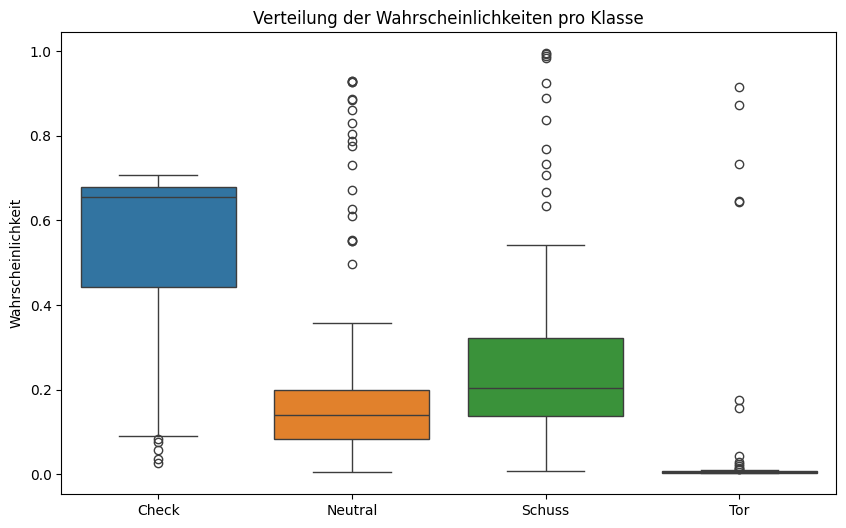

In [ ]:
# --- Evaluierung ---

def evaluate(model, test_loader, name="Model"):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for frames, labels in test_loader:
            frames = frames.to(device)
            labels = labels.to(device)
            
            if frames.ndim == 5:
                frames = frames.permute(0, 2, 1, 3, 4)
            
            outputs = model(frames)
            preds = (torch.sigmoid(outputs) > 0.5).int()
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

    y_true = torch.cat(all_labels).numpy()
    y_pred = torch.cat(all_preds).numpy()

    f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)
    print(f"{name} - F1-Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# --- Beide Modelle testen ---

evaluate(model_r3d18, test_loader, name="R3D18")
evaluate(model_resnet18_lstm, test_loader, name="ResNet18 + LSTM")

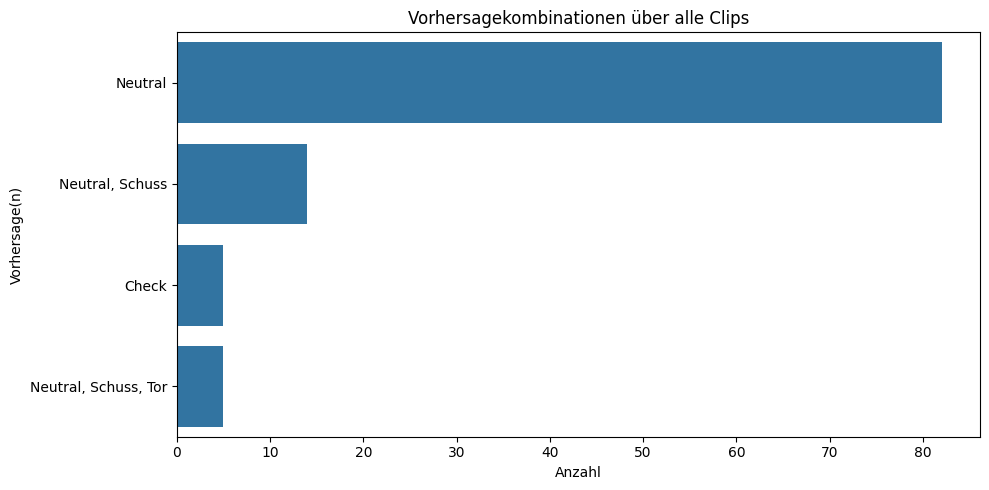

In [ ]:
# Gruppiere nach Kombinationen
df_results["combined"] = df_results["predicted_labels"].apply(lambda x: ", ".join(sorted(x)) if x else "Keine")

plt.figure(figsize=(10, 5))
sns.countplot(y=df_results["combined"], order=df_results["combined"].value_counts().index)
plt.title("Vorhersagekombinationen über alle Clips")
plt.xlabel("Anzahl")
plt.ylabel("Vorhersage(n)")
plt.tight_layout()
plt.show()

In [ ]:
# Gruppiere nach Kombinationen wie oben
df_results["combined"] = df_results["predicted_labels"].apply(
    lambda x: ", ".join(sorted(x)) if x else "Keine"
)

# Zähle Kombinationen
kombinationen = df_results["combined"].value_counts()

# Ausgabe der konkreten Zahlen
print("📊 Häufigkeit der Vorhersagekombinationen:")
print(kombinationen)

📊 Häufigkeit der Vorhersagekombinationen:
combined
Neutral                 82
Neutral, Schuss         14
Check                    5
Neutral, Schuss, Tor     5
Name: count, dtype: int64
